<a href="https://colab.research.google.com/github/aAaAaAa15672/second/blob/main/Lab4_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Сеть встречного распространения на XOR

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#XOR_train
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

In [ ]:
class NN: #нейросеть для встречного распространения
  def __init__(self):
    np.random.seed(42)
    self.w1 = np.random.randn(2, 6)
    self.w2 = np.random.randn(6, 1)
    self.lr = 0.1

  # активационные функции
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  def sigmoid_derivative(self, x):
    return x * (1 - x)

In [ ]:
net = NN()

In [ ]:
for epoch in range(1000): #обучение сети на 1000 эпохах
    # прямой ход
    # активация первого слоя
    z1 = np.dot(X_train, net.w1) # скалярное произведение входа на веса
    a1 = net.sigmoid(z1) # применение функции активации
    # активация второго слоя
    z2 = np.dot(a1, net.w2) # скалярное произведение результата первого слоя на веса
    a2 = net.sigmoid(z2) # применение функции активации

    # вычисление ошибки
    error = y_train - a2

    # обратный ход
    d2 = error * net.sigmoid_derivative(a2)
    d1 = np.dot(d2, net.w2.T) * net.sigmoid_derivative(a1)

    #обновление весов
    net.w2 += np.dot(a1.T, d2) * net.lr
    net.w1 += np.dot(X_train.T, d1) * net.lr

print("Результат обучения сети")
print(a2)
print("Бинарный выход:")
print((a2 > 0.5).astype(int))

Результат обучения сети
[[0.28645792]
 [0.70876367]
 [0.71122897]
 [0.31150196]]
Бинарный выход:
[[0]
 [1]
 [1]
 [0]]


### 2. Разделение на классы

In [ ]:
X_test = np.array([[1,1],[9.4,6.4],[2.5,2.1],[8,8],[0.5,2.2],[7.4,7.4],[7,7],[2.8,0.8],[1.2,3],[6.1,6.1]])
y_test = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0]])

In [ ]:
z1_test = np.dot(X_test, net.w1)
a1_test = net.sigmoid(z1_test)
z2_test = np.dot(a1_test,net.w2)
a2_test = net.sigmoid(z2_test)

In [ ]:
print("Ожидаемые метки:", y_test.flatten())
print("Результат сети (нечёткий):", np.round(a2_test.flatten(), 3))
print("Округлённый результат:", (a2_test > 0.5).astype(int).flatten())

Ожидаемые метки: [0 1 1 0 1 0 0 1 1 0]
Результат сети (нечёткий): [0.311 0.17  0.182 0.17  0.718 0.17  0.17  0.687 0.505 0.17 ]
Округлённый результат: [0 0 0 0 1 0 0 1 1 0]


In [ ]:
predictions = (a2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print("Точность классификации на таблице:", round(accuracy * 100, 2), "%")

Точность классификации на таблице: 80.0 %


### 3. RBF-сеть

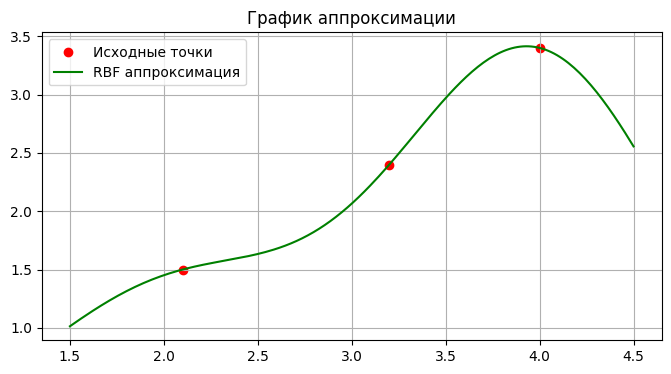

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RBFNet:
    def __init__(self, centers, sigma=1.0):
        self.centers = np.array(centers)
        self.sigma = sigma
        self.weights = None

    # вычисление значений радиально-базисных функций
    def rbf_fixed_form(self, x):
        x = np.array(x).reshape(-1, 1)  # превращает x в столбец (N, 1)
        c = self.centers.reshape(1, -1)  # превращает centers в строку (1, M)
        return np.exp(-(x - c)**2)  # радиально-базисные функции

    # обучение
    def fit(self, X_train, Y_train):
        # Вычисляем Φ-матрицу для тренировочных данных
        Phi = self.rbf_fixed_form(X_train)
        # Находим веса с помощью псевдообратной матрицы
        self.weights = np.linalg.pinv(Phi) @ Y_train

    def predict(self, x):
        # Вычисляем значения RBF для тестовых данных
        phi = self.rbf_fixed_form(x)
        # Возвращаем предсказанные значения
        return phi @ self.weights

# точки по заданию
X_train = np.array([2.1, 3.2, 4.0])
Y_train = np.array([1.5, 2.4, 3.4])
centers = np.array([2, 3, 4])

#создаем объект сети и обучаем его
net = RBFNet(centers)
net.fit(X_train, Y_train)

x_test = np.linspace(1.5, 4.5, 200)
y_pred = net.predict(x_test)

#визуализация аппроксимации
plt.figure(figsize=(8, 4))
plt.scatter(X_train, Y_train, color='red', label='Исходные точки')
plt.plot(x_test, y_pred, color='g', label='RBF аппроксимация')
plt.title('График аппроксимации')
plt.grid()
plt.legend()
plt.show()